Settings

In [2]:
#training_data = "../../downloads/full_resolution/train"
#testing_data = "../../downloads/full_resolution/test"
#training_data = "../../downloads/r2_train"
#testing_data = "../../downloads/r2_test"
training_data = "../../downloads/train_fr_10s"
testing_data = "../../downloads/test_fr_10s"
model_path = './video_classification_model.pkl'
label_map_path = './label_map.pkl'

## Train the model

In [3]:
import histogramModel as histoModel #extract_color_histogram, process_class_folder, load_data, train_model, classify_videos
from tqdm import tqdm_notebook
data, labels, label_map = histoModel.load_data(training_data, tqdm=tqdm_notebook)
model = histoModel.train_model(data, labels)

y_pred = model.predict(data)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(labels, y_pred)
print(f"Model accuracy (on the test data): {accuracy * 100:.2f}%")

Processing classes:   0%|          | 0/12 [00:00<?, ?it/s]

Processing videos in Doctor Visit:   0%|          | 0/9 [00:00<?, ?it/s]

Processing videos in Asleep-Trying to sleep:   0%|          | 0/290 [00:00<?, ?it/s]

Processing videos in EVS Visit:   0%|          | 0/41 [00:00<?, ?it/s]

Processing videos in Family:   0%|          | 0/66 [00:00<?, ?it/s]

Processing videos in Therapy:   0%|          | 0/26 [00:00<?, ?it/s]

Processing videos in Sitting In Wheelchair:   0%|          | 0/86 [00:00<?, ?it/s]

Processing videos in Talking on the Phone:   0%|          | 0/55 [00:00<?, ?it/s]

Processing videos in Eating:   0%|          | 0/150 [00:00<?, ?it/s]

Processing videos in Transfer To Bed:   0%|          | 0/8 [00:00<?, ?it/s]

Processing videos in Lying In Bed:   0%|          | 0/105 [00:00<?, ?it/s]

Processing videos in Watching TV:   0%|          | 0/150 [00:00<?, ?it/s]

Processing videos in Nurse Visit:   0%|          | 0/150 [00:00<?, ?it/s]

[LibSVM]Model accuracy (on the test data): 100.00%


#### Save the model

In [4]:
# Save the trained model and label map to files
import joblib
joblib.dump(model, 'video_classification_model.pkl')
joblib.dump(label_map, 'label_map.pkl')

print("Model trained and saved as 'video_classification_model.pkl'.")
print("Label map saved as 'label_map.pkl'.")

Model trained and saved as 'video_classification_model.pkl'.
Label map saved as 'label_map.pkl'.


#### Load the model

In [ ]:
import joblib
model = joblib.load(model_path)
label_map = joblib.load(label_map_path)

## Test the model

You can "Execute cell and below"

In [5]:
import histogramModel as histoModel #extract_color_histogram, process_class_folder, load_data, train_model, classify_videos
from concurrent.futures import ThreadPoolExecutor

# Classify videos and get true and predicted labels
from tqdm import tqdm_notebook
true_labels, predicted_labels = histoModel.classify_videos(testing_data, model, label_map, tqdm=tqdm_notebook)

# Calculate and print accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(true_labels, predicted_labels)
print(f"Classification accuracy: {accuracy * 100:.2f}%")

Processing videos:   0%|          | 0/1106 [00:00<?, ?it/s]


Accurate! ✅ Asleep-Trying to sleep Asleep-Trying to sleep

Accurate! ✅ Asleep-Trying to sleep Asleep-Trying to sleep

Accurate! ✅ Asleep-Trying to sleep Asleep-Trying to sleep

Accurate! ✅ Asleep-Trying to sleep Asleep-Trying to sleep

Accurate! ✅ Asleep-Trying to sleep Asleep-Trying to sleep

Accurate! ✅ Asleep-Trying to sleep Asleep-Trying to sleep

Accurate! ✅ Asleep-Trying to sleep Asleep-Trying to sleep

Accurate! ✅ Asleep-Trying to sleep Asleep-Trying to sleep


Accurate! ✅ Asleep-Trying to sleep Asleep-Trying to sleep
Accurate! ✅ Asleep-Trying to sleep Asleep-Trying to sleep

Accurate! ✅ Asleep-Trying to sleep Asleep-Trying to sleep

Accurate! ✅ Asleep-Trying to sleep Asleep-Trying to sleep

Accurate! ✅ Asleep-Trying to sleep Asleep-Trying to sleep

Accurate! ✅ Asleep-Trying to sleep Asleep-Trying to sleep

Accurate! ✅ Asleep-Trying to sleep Asleep-Trying to sleep

Accurate! ✅ Asleep-Trying to sleep Asleep-Trying to sleep

Accurate! ✅ Asleep-Trying to sleep Asleep-Trying to sle

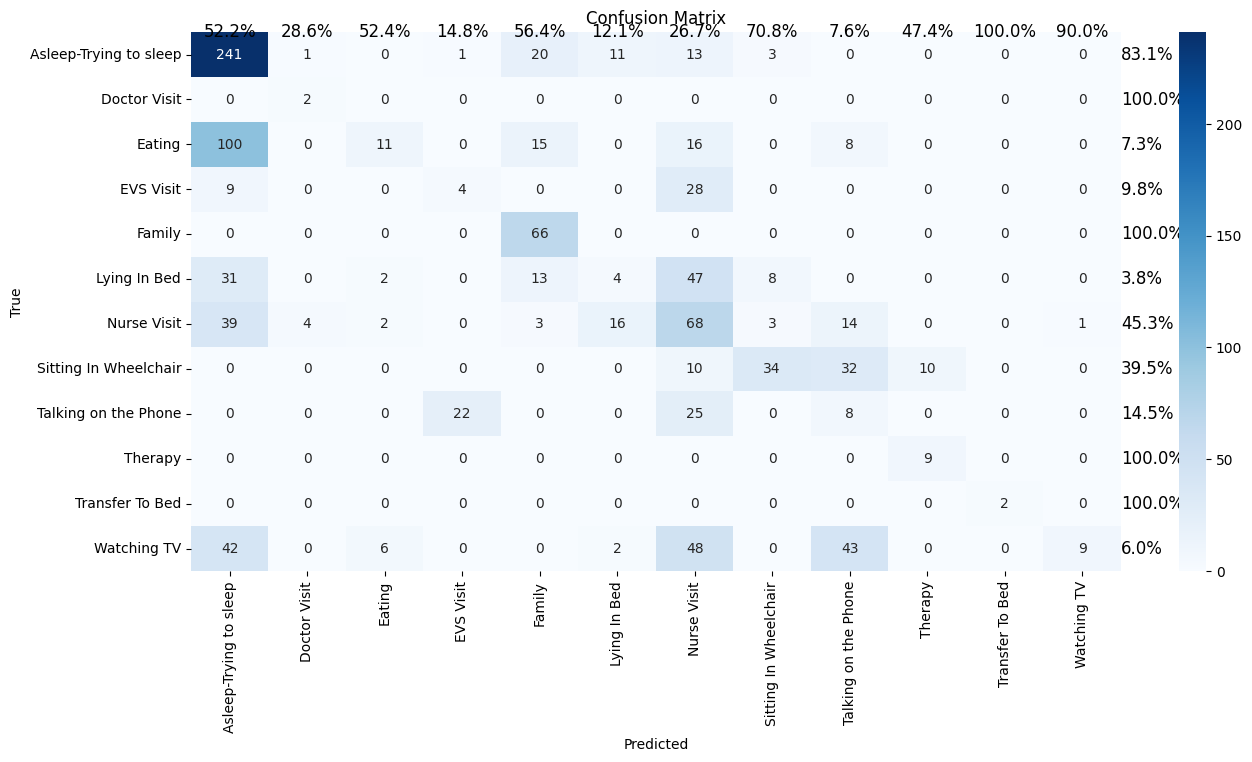

In [6]:
import os
import numpy as np
def plot_confusion_matrix(true_labels, predicted_labels):
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(true_labels, predicted_labels)
    import matplotlib.pyplot as plt
    plt.figure(figsize=(15, 7))
    import seaborn as sns
    class_names = os.listdir(testing_data)
    sns.heatmap(cm, xticklabels=os.listdir(testing_data), yticklabels=class_names, annot=True, fmt='d', cmap='Blues')

    # Calculate recall for each row
    row_sums = cm.sum(axis=1)
    correct_predictions = np.diag(cm)
    row_recalls = correct_predictions / row_sums
    
    # Annotate the heatmap with row accuracies
    for i, recall in enumerate(row_recalls):
        plt.text(len(class_names), i + .5, f'{recall * 100.0:.1f}%', va='center', ha='left', color='black', fontsize=12)

    # Calculate precision for each column
    col_sums = cm.sum(axis=0)
    col_precisions = correct_predictions / col_sums

    # Annotate the heatmap with column precisions
    for j, precision in enumerate(col_precisions):
        plt.text(j + .5, 0, f'{precision*100.0:.1f}%', va='center', ha='center', color='black', fontsize=12)

    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

# Plot confusion matrix heatmap
plot_confusion_matrix(true_labels, predicted_labels)

In [7]:
from sklearn.metrics import classification_report

# Assuming y_true and y_pred are your true and predicted labels
print(classification_report(true_labels, predicted_labels, target_names=os.listdir(testing_data)))

                        precision    recall  f1-score   support

Asleep-Trying to sleep       0.52      0.83      0.64       290
          Doctor Visit       0.29      1.00      0.44         2
                Eating       0.52      0.07      0.13       150
             EVS Visit       0.15      0.10      0.12        41
                Family       0.56      1.00      0.72        66
          Lying In Bed       0.12      0.04      0.06       105
           Nurse Visit       0.27      0.45      0.34       150
 Sitting In Wheelchair       0.71      0.40      0.51        86
  Talking on the Phone       0.08      0.15      0.10        55
               Therapy       0.47      1.00      0.64         9
       Transfer To Bed       1.00      1.00      1.00         2
           Watching TV       0.90      0.06      0.11       150

              accuracy                           0.41      1106
             macro avg       0.47      0.51      0.40      1106
          weighted avg       0.48     